# Read Training results

## Python 2

In [1]:
from __future__ import division
from __future__ import print_function
import tensorflow as tf
import numpy as np
import scipy.sparse as sp
from sklearn import metrics
import pandas as pd
import pickle
import datetime

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Results with training & validation accuracy

In [3]:
ses = ['DTI','DTI(T)','PPI','PPI(T)'] +\
    2*['Mumps', 'carbuncle', 'coccydynia', 'Bleeding','disorder Renal', 'emesis']
ses_pairs = [(0,1),(2,3),(4,10),(5,11),(6,12),(7,13),(8,14),(9,15)]
sims = ['toy','toyDSE','toyBDM','toyw2','real','realDSE','realBDM','realw2']
sims = ['real','realDSE','realBDM','realw2']
metrics = ['AUROC','AUCPR','Val acc','Train acc']
n_ses = len(ses)
n_sims = len(sims)
epochs = 50

In [4]:
data = np.zeros([epochs,n_ses,4,n_sims])
test_data = np.zeros([n_ses,3,n_sims])
performance = np.zeros([3,n_sims])

#### Real no features

In [5]:
filename = './results_training/TRAIN_real_genes_16266_drugs_627_se_6_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
data[:,:,0,0] = val_auc.transpose()
data[:,:,1,0] = val_auprc.transpose()
data[:,:,2,0] = val_acc
data[:,:,3,0] = train_acc
test_data[:,:,0] = test_scores
performance[:,0] = time, vms, rss
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

val_auc Imported successfully
train_acc Imported successfully
test_scores Imported successfully
epoch Imported successfully
val_acc Imported successfully
val_auprc Imported successfully
time Imported successfully
vms Imported successfully
rss Imported successfully


Total Time: 2 days, 4:02:17.132484
Virtual Memory: 104.147611648 Gb
RSS Memory: 1.360678912 Gb


#### Real DSE

In [6]:
filename = './results_training/TRAIN_real_DSE_9688_genes_16266_drugs_627_se_6_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
data[:,:,0,1] = val_auc.transpose()
data[:,:,1,1] = val_auprc.transpose()
data[:,:,2,1] = val_acc
data[:,:,3,1] = train_acc
test_data[:,:,1] = test_scores
performance[:,1] = time, vms, rss
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

val_auc Imported successfully
train_acc Imported successfully
test_scores Imported successfully
epoch Imported successfully
val_acc Imported successfully
val_auprc Imported successfully
time Imported successfully
vms Imported successfully
rss Imported successfully


Total Time: 2 days, 3:39:16.006575
Virtual Memory: 104.71593984 Gb
RSS Memory: 1.455194112 Gb


#### Real BDM

In [7]:
filename = './results_training/TRAIN_real_BDM_genes_16266_drugs_627_se_6_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
data[:,:,0,2] = val_auc.transpose()
data[:,:,1,2] = val_auprc.transpose()
data[:,:,2,2] = val_acc
data[:,:,3,2] = train_acc
test_data[:,:,2] = test_scores
performance[:,2] = time, vms, rss
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

val_auc Imported successfully
train_acc Imported successfully
test_scores Imported successfully
epoch Imported successfully
val_acc Imported successfully
val_auprc Imported successfully
time Imported successfully
vms Imported successfully
rss Imported successfully


Total Time: 2 days, 5:01:40.139048
Virtual Memory: 97.108123648 Gb
RSS Memory: 1.46624512 Gb


#### Real DSE BDM

In [8]:
filename = './results_training/TRAIN_real_BDM_DSE_9688_genes_16266_drugs_627_se_6_epochs_50_h1_64_h2_32_lr_0.001_dropout_0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
data[:,:,0,3] = val_auc.transpose()
data[:,:,1,3] = val_auprc.transpose()
data[:,:,2,3] = val_acc
data[:,:,3,3] = train_acc
test_data[:,:,3] = test_scores
performance[:,3] = time, vms, rss
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

val_auc Imported successfully
train_acc Imported successfully
test_scores Imported successfully
epoch Imported successfully
val_acc Imported successfully
val_auprc Imported successfully
time Imported successfully
vms Imported successfully
rss Imported successfully


Total Time: 2 days, 3:39:08.276100
Virtual Memory: 98.421334016 Gb
RSS Memory: 1.432317952 Gb


### Performance plots

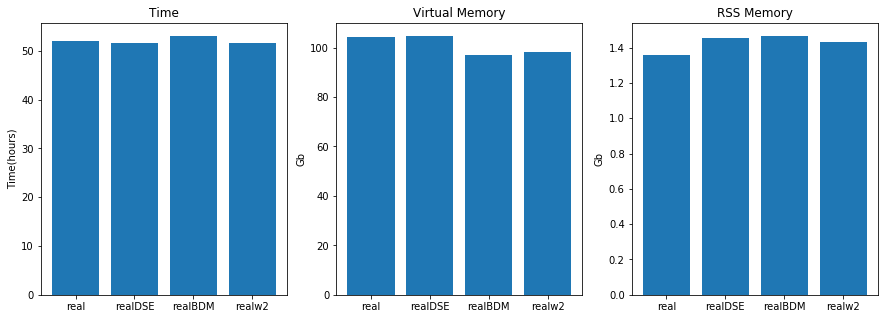

In [9]:
x = np.arange(4)+1
figure(figsize=[15,5])
ax1=subplot(1,3,1)
bar(x,performance[0,:]/3600)
ylabel('Time(hours)')
title('Time')
ax1.set_xticks(x)
ax1.set_xticklabels(sims)
ax2=subplot(1,3,2)
bar(x,performance[1,:]*1e-9)
ylabel('Gb')
title('Virtual Memory')
ax2.set_xticks(x)
ax2.set_xticklabels(sims)
ax3=subplot(1,3,3)
bar(x,performance[2,:]*1e-9)
ylabel('Gb')
title('RSS Memory')
ax3.set_xticks(x)
ax3.set_xticklabels(sims)
show()

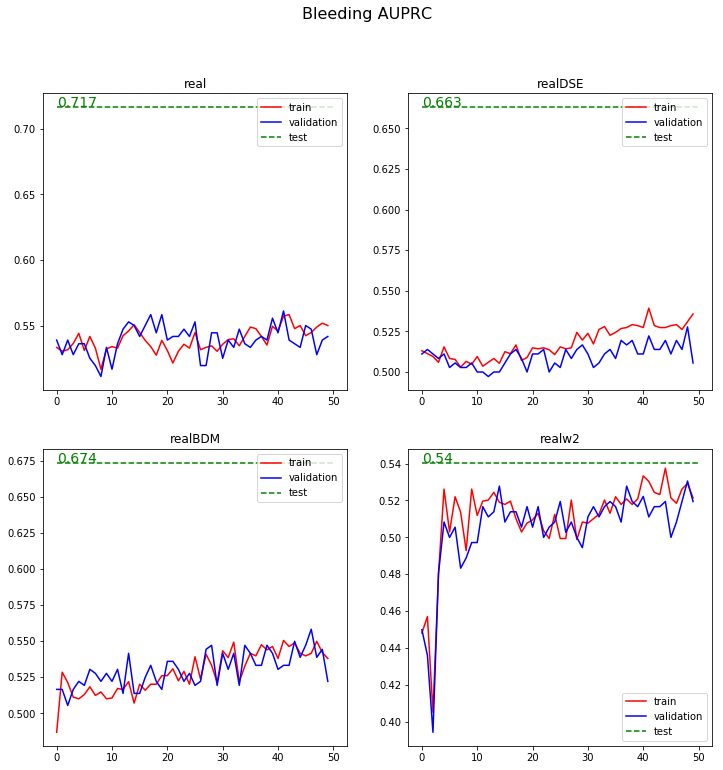

In [10]:
pair_idx = 5
figure(figsize=[12,12])
suptitle(ses[ses_pairs[pair_idx][0]]+' AUPRC',fontsize=16)
for i in range(n_sims):   
    subplot(2,2,i+1)
    test_val = test_data[ses_pairs[pair_idx][0],1,i]
    hlines(test_val,0,50, colors='g', linestyles='dashed', label='test')
    text(0, test_val, str(np.round(test_val,3)), fontsize=14,color='g')
    plot(data[:,ses_pairs[pair_idx][0],3,i],label='train',color='r')
    plot(data[:,ses_pairs[pair_idx][0],2,i],label='validation',color='b')
    legend(loc='best')
    title(sims[i])
show()

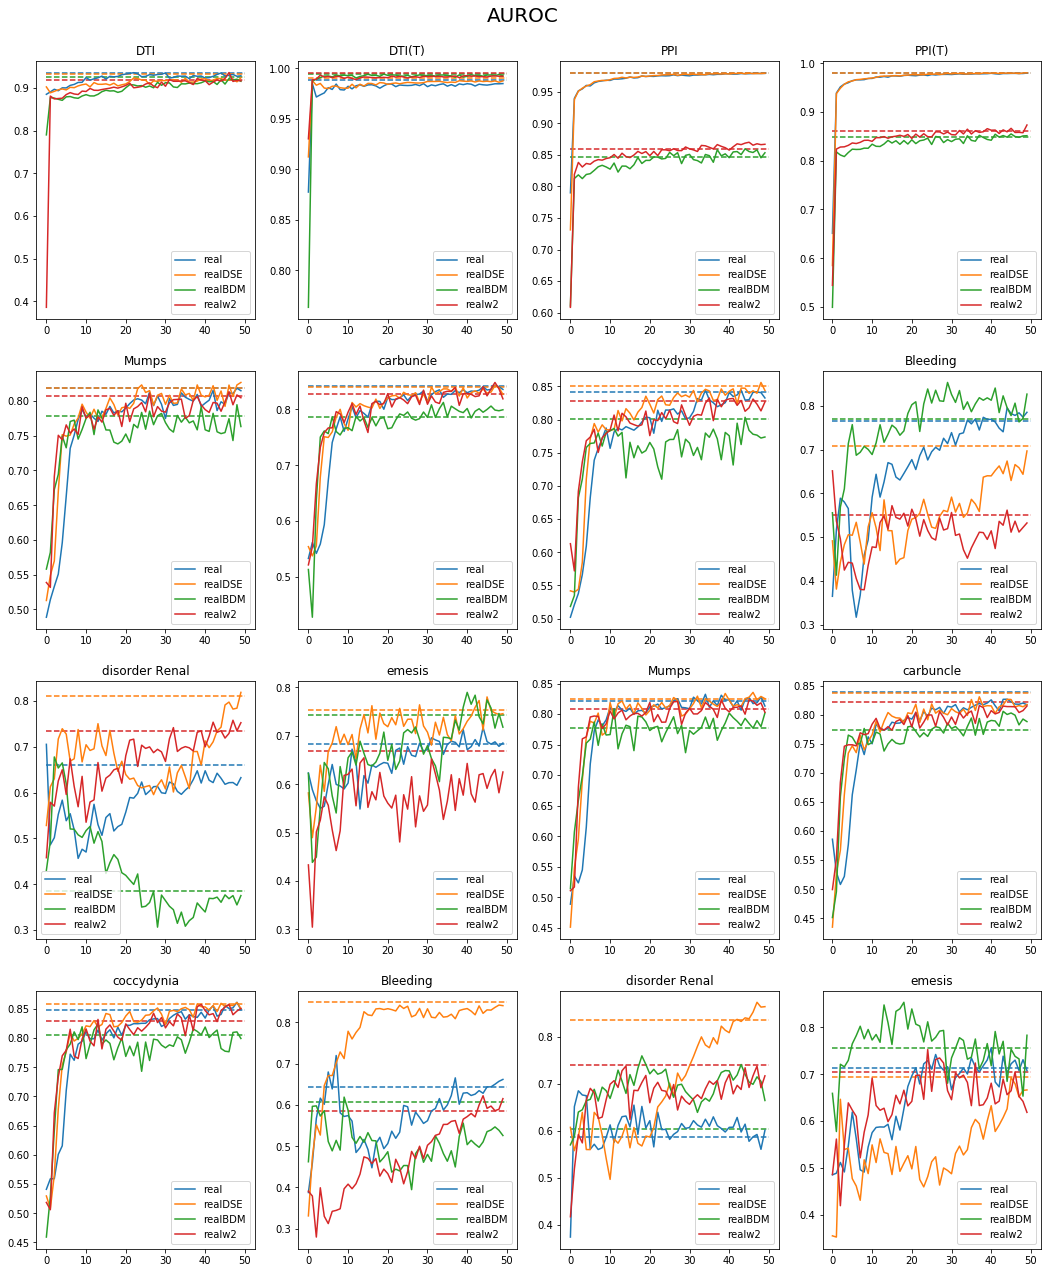

In [12]:
m=0
figure(figsize=[18,15])
suptitle(metrics[m],x=0.5,y=1.25,fontsize=20)
for i in range(n_ses):
    ax = subplot(4,4,i+1)
    for j in range(n_sims):
        color=next(ax._get_lines.prop_cycler)['color']
        plot(data[:,i,m,j],label=sims[j],color=color)
        test_val = test_data[i,int(m*3/4),j]
        hlines(test_val,0,50, colors=color, linestyles='dashed')
        title(ses[i])
    legend()
subplots_adjust(left=None, bottom=0.1, right=None, top=1.2, wspace=None, hspace=None)
show()

## Data with BDM and w/o protein features

In [ ]:
new_data = np.zeros([16,21,4,5])
new_perf = np.zeros([3,5])
new_epochs = np.arange(21)

#### Real only BDM

In [ ]:
print('REAL NO FEAT')
filename = './results_training/TRAIN_real_BDM_genes_16269_drugs_630_se_6_epochs_20_h1_64_h2_32_lr_0.001_dropout_0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')
new_data[:,:,0,0] = val_auc
new_data[:,:,1,0] = val_auprc
new_data[:,:,2,0] = val_apk
new_data[:,:,3,0] = train_cost
new_perf[:,0] = time,vms,rss

#### Real with drug features & BDM

In [ ]:
print('REAL DSE')
filename = './results_training/TRAIN_real_BDM_DSE_9688_genes_16269_drugs_630_se_6_epochs_20_h1_64_h2_32_lr_0.001_dropout_0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')
new_data[:,:,0,1] = val_auc
new_data[:,:,1,1] = val_auprc
new_data[:,:,2,1] = val_apk
new_data[:,:,3,1] = train_cost
new_perf[:,1] = time,vms,rss

#### Toy only BDM

In [ ]:
print('TOY NO FEAT')
filename = './results_training/TRAIN_toy_BDM_genes_16269_drugs_630_se_6_epochs_20_h1_64_h2_32_lr_0.001_dropout_0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')
new_data[:,:,0,3] = val_auc
new_data[:,:,1,3] = val_auprc
new_data[:,:,2,3] = val_apk
new_data[:,:,3,3] = train_cost
new_perf[:,3] = time,vms,rss

#### Toy with drug features & BDM

In [ ]:
print('TOY DSE')
filename = './results_training/TRAIN_toy_BDM_DSE_9688_genes_16269_drugs_630_se_6_epochs_20_h1_64_h2_32_lr_0.001_dropout_0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')
new_data[:,:,0,4] = val_auc
new_data[:,:,1,4] = val_auprc
new_data[:,:,2,4] = val_apk
new_data[:,:,3,4] = train_cost
new_perf[:,4] = time,vms,rss

## Toy without features

In [ ]:
print('TOY NO FEAT')
filename = './results_training/TRAIN_toy_genes_16269_drugs_630_se_6_epochs_20_h1_64_h2_32_lr_0.001_dropout_0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')
new_data[:,:,0,2] = val_auc
new_data[:,:,1,2] = val_auprc
new_data[:,:,2,2] = val_apk
new_data[:,:,3,2] = train_cost
new_perf[:,2] = time,vms,rss

## Data from first simulations

In [ ]:
data = np.zeros([16,72,4,2])
perf = np.zeros([3,2])
epochs = np.linspace(0,20,72)

#### Real without features

In [ ]:
print('REAL NO FEAT')
filename = './results_training/TRAIN_real_reduced_epochs20_h164_h232_lr0.001dropout0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')
data[:,:,0,0] = val_auc
data[:,:,1,0] = val_auprc
data[:,:,2,0] = val_apk
data[:,:,3,0] = train_cost
perf[:,0] = time,vms,rss

#### Real with Drug features

In [ ]:
print('REAL DSE')
filename = './results_training/TRAIN_real_reduced_DSE_epochs20_h164_h232_lr0.001dropout0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")
print('\n')
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')
data[:,:,0,1] = val_auc
data[:,:,1,1] = val_auprc
data[:,:,2,1] = val_apk
data[:,:,3,1] = train_cost
perf[:,1] = time,vms,rss

## Performance plots

In [ ]:
perf = np.concatenate((perf,new_perf),axis=1)

In [ ]:
x = np.arange(7)+1
labels = ['R','R+D','R+C','R+D+C','T','T+C','T+D+C']
figure(figsize=[15,5])
ax1=subplot(1,3,1)
bar(x,perf[0,:]/3600)
ylabel('Time(hours)')
title('Time')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax2=subplot(1,3,2)
bar(x,perf[1,:]*1e-9)
ylabel('Gb')
title('Virtual Memory')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax3=subplot(1,3,3)
bar(x,perf[2,:]*1e-9)
ylabel('Gb')
title('RSS Memory')
ax3.set_xticks(x)
ax3.set_xticklabels(labels)
show()

## Toy data plots

In [ ]:
ses = ['DTI','DTI(T)','PPI','PPI(T)'] + 2*['Neumonia','High blood pressure',
                                             'Acute kidney failure','Heart rate increased',
                                             'Heart attack','Respiratory failure']
sims_new = ['real BDM','real DSE+BDM', 'toy', 'toy BDM','toy DSE+BDM']
metric = ['AUROC','AUPRC','AU@50','Train cost']

In [ ]:
m = 0 #index of metric
figure(figsize=[14,10])
suptitle(metric[m], fontsize=14)
dims = np.shape(new_data)
for i in range(len(ses)):
    subplot(4,4,i+1)
    for j in [2,3,4]:
        plot(new_data[i,:,m,j],label=sims_new[j])
    title(ses[i])
    subplots_adjust(left=None, bottom=0.1, right=None, top=1.2, wspace=None, hspace=None)
legend(loc='upper left')
suptitle(metric[m], fontsize=20,y=1.25)
show()

## Real data plots

In [ ]:
m = 0 #index of metric
figure(figsize=[14,10])
suptitle(metric[m], fontsize=14)
dims = np.shape(new_data)
for i in range(len(ses)):
    subplot(4,4,i+1)
    plot(epochs,data[i,:,m,0],label='real no feat')
    plot(epochs,data[i,:,m,1],label='real DSE')
    plot(new_epochs,new_data[i,:,m,0],label='real BDM')
    plot(new_epochs,new_data[i,:,m,1],label='real DSE+BDM')
    title(ses[i])
    subplots_adjust(left=None, bottom=0.1, right=None, top=1.2, wspace=None, hspace=None)
legend(loc='lower right')
suptitle(metric[m], fontsize=20,y=1.25)
show()

## Data for presentation AlgDyn

In [ ]:
# Data structure loading
filename = './data/data_structures/DECAGON_real_reduced_DSE'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")

In [ ]:
c = np.zeros([len(adj_mats_orig[1,1])])
for i in range(len(c)):
    c[i] = np.sum(adj_mats_orig[1,1][i])
c

In [ ]:
names = ['DTI','DTI(T)','PPI','PPI(T)'] + 2*['Neumonia','High blood pressure',
                                             'Acute kidney failure','Heart rate increased',
                                             'Heart attack','Respiratory failure']

In [ ]:
filenames = ['reduced','reduced_DSE','reduced_DSE_PF','reduced_DSE_NPF','reduced_DSE_PF_BDM'
            ,'reduced_DSE_NPF_BDM']
titles = ['No Features','DSE','DSE + PF','DSE+NPF','BDM + PF','BDM + NPF']

In [ ]:
# Results loading
filename = './results_training/TRAIN_real_reduced_epochs20_h164_h232_lr0.001dropout0.1'
with open(filename, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")

In [ ]:
print('Total Time:',datetime.timedelta(seconds=time))
print('Virtual Memory:',vms*1e-9,'Gb')
print('RSS Memory:',rss*1e-9,'Gb')

In [ ]:
n_files = len(titles)
idx = [0,2,4,5,6,7,8,9]
data_AUROC = np.zeros([len(idx),72,n_files])
data_AUPRC = np.zeros([len(idx),72,n_files])
for i in range(n_files):
    filename = './results_training/TRAIN_real_' + filenames[i] + '_epochs20_h164_h232_lr0.001dropout0.1'
    f = open(filename, 'rb')
    DS = pickle.load(f)
    for j in range(len(idx)):
        val_auc = DS['val_auc']
        val_auprc = DS['val_auprc']
        data_AUROC[j,:,i] = val_auc[idx[j],:]
        data_AUPRC[j,:,i] = val_auprc[idx[j],:]
    f.close()

In [ ]:
figure(figsize(20,12))
for i in range(n_files):
    subplot(2,3,i+1)
    for j in range(len(idx)):
        plot(data_AUROC[j,:,i],label=names[idx[j]])
    title(titles[i])
    legend()
show()

In [ ]:
figure(figsize(20,12))
for i in range(len(idx)):
    subplot(2,4,i+1)
    for j in range(n_files):
        plot(data_AUPRC[i,:,j],label=titles[j])
    title(names[idx[i]])
    legend()
show()

# Final performance for all networks

In [ ]:
apk_red_BDM_NPF = pd.read_csv('results_training/apk_red_BDM_NPF.txt',header=None).to_numpy().squeeze()
apk_red_BDM_PF = pd.read_csv('results_training/apk_red_BDM_PF.txt',header=None).to_numpy().squeeze()
apk_red_DSE_NPF = pd.read_csv('results_training/apk_red_DSE_NPF.txt',header=None).to_numpy().squeeze()
apk_red_DSE_PF = pd.read_csv('results_training/apk_red_DSE_PF.txt',header=None).to_numpy().squeeze()
apk_red_DSE = pd.read_csv('results_training/apk_red_DSE.txt',header=None).to_numpy().squeeze()
apk_red = pd.read_csv('results_training/apk_red.txt',header=None).to_numpy().squeeze()
apk = np.stack([apk_red,apk_red_DSE,apk_red_DSE_PF,apk_red_DSE_NPF,apk_red_BDM_PF,
                apk_red_BDM_NPF]).reshape(6,16,1)


In [ ]:
auroc_red_BDM_NPF = pd.read_csv('results_training/auroc_red_BDM_NPF.txt',header=None).to_numpy().squeeze()
auroc_red_BDM_PF = pd.read_csv('results_training/auroc_red_BDM_PF.txt',header=None).to_numpy().squeeze()
auroc_red_DSE_NPF = pd.read_csv('results_training/auroc_red_DSE_NPF.txt',header=None).to_numpy().squeeze()
auroc_red_DSE_PF = pd.read_csv('results_training/auroc_red_DSE_PF.txt',header=None).to_numpy().squeeze()
auroc_red_DSE = pd.read_csv('results_training/auroc_red_DSE.txt',header=None).to_numpy().squeeze()
auroc_red = pd.read_csv('results_training/auroc_red.txt',header=None).to_numpy().squeeze()
auroc = np.stack([auroc_red,auroc_red_DSE,auroc_red_DSE_PF,auroc_red_DSE_NPF,
                  auroc_red_BDM_PF,auroc_red_BDM_NPF]).reshape(6,16,1)


In [ ]:
auprc_red_BDM_NPF = pd.read_csv('results_training/auprc_red_BDM_NPF.txt',header=None).to_numpy().squeeze()
auprc_red_BDM_PF = pd.read_csv('results_training/auprc_red_BDM_PF.txt',header=None).to_numpy().squeeze()
auprc_red_DSE_NPF = pd.read_csv('results_training/auprc_red_DSE_NPF.txt',header=None).to_numpy().squeeze()
auprc_red_DSE_PF = pd.read_csv('results_training/auprc_red_DSE_PF.txt',header=None).to_numpy().squeeze()
auprc_red_DSE = pd.read_csv('results_training/auprc_red_DSE.txt',header=None).to_numpy().squeeze()
auprc_red = pd.read_csv('results_training/auprc_red.txt',header=None).to_numpy().squeeze()
auprc = np.stack([auprc_red,auprc_red_DSE,auprc_red_DSE_PF,auprc_red_DSE_NPF,
                  auprc_red_BDM_PF,auprc_red_BDM_NPF]).reshape(6,16,1)

In [ ]:
final_metrics = np.concatenate([auroc,auprc,apk],axis=2)

In [ ]:
figure(figsize=[16,8])
labels = ['no feat', 'DSE', 'DSE + PF', 'DSE + N', 'BDM + PF' , 'BDM + N']
idx2=[4,5,6,7,8,9]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
cont=1
for i in [0,2]:
    a = final_metrics[:,i,0]
    b = final_metrics[:,i,1]
    ax = subplot(1,2,cont)
    bar(x - width/2, a , width/2, label='AUROC')
    bar(x + width/2, b, width/2, label='AUPRC')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    xticks(x, labels)
    title(names[i])
    legend(loc='lower center')
    eps = 0.05
    cont+=1
    for j in range(len(a)):
        text(x[j] - width/2-eps, a[j]-eps/4, str(round(a[j],2)))#, color='blue', fontweight='bold')
        text(x[j]+width/2, b[j], str(round(b[j],2)))#, color='blue', fontweight='bold')
    
show()